# Tutorial from CS231


## Importing libraries & classes

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pdb

# From self functions
import mnist
from softmax import softmax_loss
from linear_classifier import LinearClassifier

from __future__ import print_function

## Import MNIST Data

In [9]:
### Load MNIST data ###
# mnist.init() # Only need to run once, can be commented out after first run
X_train, y_train, X_test, y_test = mnist.load()

## Preprocessing the data
1. Diving to Training, Validation & test sets
2. Data Normalization

In [10]:
### Preprocess data ###
num_training = 59000
num_validation = 1000
num_dev = 500
num_test = 1000

# subsample the data
# Validation set
mask = list(range(num_training, num_training + num_validation))
X_val = X_train[mask]
y_val = y_train[mask]
# Training set
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]
# Subsample of test set
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]
# Create a small development set (subsample of training set)
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# Normalize image
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255
X_dev = X_dev / 255
mean_image = np.mean(X_train, axis = 0)
X_train = X_train - mean_image
X_val = X_val - mean_image
X_test = X_test - mean_image
X_dev = X_dev - mean_image

## Implement the Softmax function

In [11]:
# Generate a random softmax weight matrix and use it to compute the loss
W = np.random.randn(784, 10) * 1e-4
b = np.random.randn(10) * 1e-4
loss, grad_W, grad_b = softmax_loss(W, b, X_dev, y_dev, 0.0)

# As a rough sanity check, loss should be close to -log(0.1)
print('loss: {:f}'.format(loss))
print('sanity check: {:f}'.format(-np.log(0.1)))

loss: 2.302603
sanity check: 2.302585


## Do gradient check

In [12]:
# gradient check function
def grad_check(f, x, analytic_grad, num_checks=10, h=1e-5):
  """
  sample a few random elements and only return numerical
  in this dimensions.
  """

  for i in range(num_checks):
    ix = tuple([random.randrange(m) for m in x.shape])

    oldval = x[ix]
    x[ix] = oldval + h # increment by h
    fxph = f(x) # evaluate f(x + h)
    x[ix] = oldval - h # increment by h
    fxmh = f(x) # evaluate f(x - h)
    x[ix] = oldval # reset

    grad_numerical = (fxph - fxmh) / (2 * h)
    grad_analytic = analytic_grad[ix]
    rel_error = abs(grad_numerical - grad_analytic) / (abs(grad_numerical) + abs(grad_analytic))
    print('numerical: %f analytic: %f, relative error: %e' % (grad_numerical, grad_analytic, rel_error))

In [13]:
# Your analytical gradient should be close to numerical gradient, error less than 1e-5. 
f = lambda w: softmax_loss(w, b, X_dev, y_dev, 0.0)[0]
print('dw w/o reg')
grad_numerical_w = grad_check(f, W, grad_W, 5)
f = lambda b: softmax_loss(W, b, X_dev, y_dev, 0.0)[0]
print('db w/o reg')
grad_numerical_b = grad_check(f, b, grad_b, 5)


# similar to SVM case, do another gradient check with regularization
loss, grad_W, grad_b = softmax_loss(W, b, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss(w, b, X_dev, y_dev, 5e1)[0]
print('dw with reg')
grad_numerical_W = grad_check(f, W, grad_W, 5)
f = lambda b: softmax_loss(W, b, X_dev, y_dev, 5e1)[0]
print('db with reg')
grad_numerical_b = grad_check(f, b, grad_b, 5)

dw w/o reg
numerical: 0.000000 analytic: 0.000000, relative error: 1.893001e-04
numerical: -0.006488 analytic: -0.006488, relative error: 1.143991e-09
numerical: -0.000002 analytic: -0.000002, relative error: 2.225087e-06
numerical: 0.009877 analytic: 0.009877, relative error: 7.527791e-10
numerical: 0.018050 analytic: 0.018050, relative error: 2.462272e-10
db w/o reg
numerical: -0.008004 analytic: -0.007927, relative error: 4.883297e-03
numerical: -0.008004 analytic: -0.007927, relative error: 4.883297e-03
numerical: -0.025986 analytic: -0.025908, relative error: 1.499149e-03
numerical: 0.015992 analytic: 0.016070, relative error: 2.426377e-03
numerical: -0.025986 analytic: -0.025908, relative error: 1.499149e-03
dw with reg
numerical: 0.001472 analytic: 0.001472, relative error: 2.221615e-10
numerical: -0.000119 analytic: -0.000119, relative error: 3.439303e-08
numerical: -0.000427 analytic: -0.000427, relative error: 8.881093e-09
numerical: 0.003548 analytic: 0.003548, relative erro

## Open the linear_classifier.py & implement Stohastic gradient descent.

In [14]:
from linear_classifier import LinearClassifier
classifier = LinearClassifier()
loss_hist = classifier.train(X_train, y_train, learning_rate=1e-7, reg=5e4, num_iters=1500, verbose=True)

iteration 0 / 1500: loss 198.669893
iteration 250 / 1500: loss 18.320390
iteration 500 / 1500: loss 3.609146
iteration 750 / 1500: loss 2.409166
iteration 1000 / 1500: loss 2.311270
iteration 1250 / 1500: loss 2.303285


## Setting plot window

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Ploting the loss

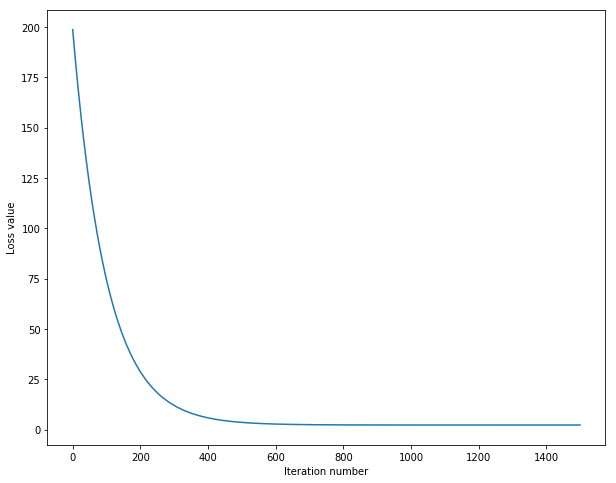

In [16]:
# Plot loss function as iteration number.
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

## Evaluate accuracy

In [17]:
# Implement predict function and evaluate performance on training and validation set.
y_train_pred = classifier.predict(X_train)
print('training accuracy: {:f}'.format(np.mean(y_train == y_train_pred)))
y_val_pred = classifier.predict(X_val)
print('validation accuracy: {:f}'.format(np.mean(y_val == y_val_pred)))

training accuracy: 0.670051
validation accuracy: 0.739000


## Hyper-parameter tuning. Find the best set of learning rate and regularization strength. 

In [18]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths.
results = {}
best_val = -1
best_softmax = None
learning_rates = [1e-7, 5e-7, 6.75e-7, 6.9e-7]
regularization_strengths = [2.5e4, 5e4, 0.95e4, 1e4]

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
#                                                                              #
#                                                                              #
################################################################################
from linear_classifier import LinearClassifier

for lr in learning_rates:
    for reg_val in regularization_strengths:
        softmaxtrainer = LinearClassifier()
        softmaxtrainer.train(X_train, y_train, learning_rate=lr, reg=reg_val, num_iters=1500, verbose=True)
        
        predicted_Y_Train = softmaxtrainer.predict(X_train)
        train_accuracy = np.mean(y_train == predicted_Y_Train)
        
        predicted_Y_Val = softmaxtrainer.predict(X_val)
        val_accuracy = np.mean(y_val == predicted_Y_Val) 
        
        results[(lr, reg_val)] = (train_accuracy, val_accuracy)
        
        if best_val < val_accuracy:
            best_val = val_accuracy
            best_classifier = softmaxtrainer
        
        
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 1500: loss 99.699208
iteration 250 / 1500: loss 30.163636
iteration 500 / 1500: loss 10.272280
iteration 750 / 1500: loss 4.582399
iteration 1000 / 1500: loss 2.954725
iteration 1250 / 1500: loss 2.489107
iteration 0 / 1500: loss 196.609738
iteration 250 / 1500: loss 18.152329
iteration 500 / 1500: loss 3.595482
iteration 750 / 1500: loss 2.408037
iteration 1000 / 1500: loss 2.311179
iteration 1250 / 1500: loss 2.303275
iteration 0 / 1500: loss 38.970492
iteration 250 / 1500: loss 25.100663
iteration 500 / 1500: loss 16.476950
iteration 750 / 1500: loss 11.115103
iteration 1000 / 1500: loss 7.781747
iteration 1250 / 1500: loss 5.709317
iteration 0 / 1500: loss 41.374033
iteration 250 / 1500: loss 25.994356
iteration 500 / 1500: loss 16.668355
iteration 750 / 1500: loss 11.014150
iteration 1000 / 1500: loss 7.585111
iteration 1250 / 1500: loss 5.505664
iteration 0 / 1500: loss 99.918157
iteration 250 / 1500: loss 2.483757
iteration 500 / 1500: loss 2.302899
iteration 750 /

## Select the best trained softmax network

In [19]:
# evaluate on test set
# Evaluate the best softmax on test set
y_test_pred = best_classifier.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('softmax on raw pixels final test set accuracy: {:f}'.format(test_accuracy, ))

softmax on raw pixels final test set accuracy: 0.705000


## Visualization of the weights per class

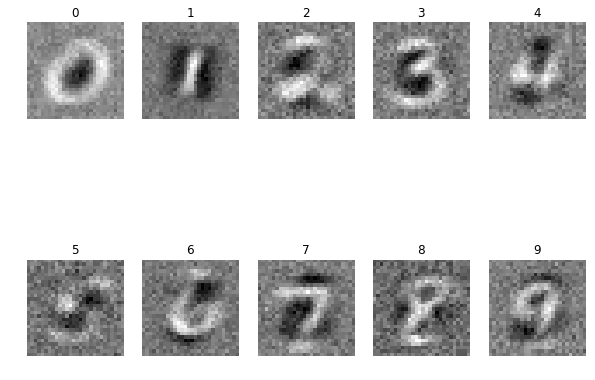

In [20]:
# Visualize the learned weights for each class
w = best_classifier.W#[:-1,:] # strip out the bias
w = w.reshape(28, 28, 10)

w_min, w_max = np.min(w), np.max(w)

classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])